In [1]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization


In [2]:
# DATA PROCESSING

In [3]:
trainDataGen = ImageDataGenerator(
		rotation_range = 5,
		width_shift_range = 0.1,
		height_shift_range = 0.1,
		rescale = 1.0/255,
		shear_range = 0.2,
		zoom_range = 0.2,		
		horizontal_flip = False,
		fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
trainGenerator = trainDataGen.flow_from_directory(
			"F:\PE UDEMY\TEXT DETECTION\FINAL 2\devanagari+handwritten+character+dataset\DevanagariHandwrittenCharacterDataset\Train",
			target_size = (32,32),
			batch_size = 32,
			color_mode = "grayscale",
			class_mode = "categorical")
validation_generator = test_datagen.flow_from_directory(
			"F:\PE UDEMY\TEXT DETECTION\FINAL 2\devanagari+handwritten+character+dataset\DevanagariHandwrittenCharacterDataset\Test",
			target_size=(32,32),
			batch_size=32,
			color_mode = "grayscale",
			class_mode= 'categorical')


prev = ""
labels = ["ka","kha","ga","gha","kna","cha","chha","ja","jha","yna","t`a","t`ha","d`a","d`ha","adna","ta","tha","da","dha","na","pa","pha","ba","bha","ma","yaw","ra","la","waw","sha","shat","sa","ha","aksha","tra","gya","0","1","2","3","4","5","6","7","8","9"]
count = 0;


Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [4]:
# ->CNN
# ->FEATURE EXTRACTION
# ->POOLING
# ->FLATTENING

In [5]:
validation_generator = test_datagen.flow_from_directory(
			"F:\PE UDEMY\TEXT DETECTION\FINAL 2\devanagari+handwritten+character+dataset\DevanagariHandwrittenCharacterDataset\Test",
			target_size=(32,32),
			batch_size=32,
			color_mode = "grayscale",
			class_mode= 'categorical')


model = Sequential()

#Layer1----------------------------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

#Layer2-------------------------------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))


#Layers 3-----------------------------------------------------------	
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))


#Layer 4--------------------------------------------------
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))			
model.add(Flatten())


Found 13800 images belonging to 46 classes.




In [6]:
#Fully Connected Layer 1----------------
model.add(Dense(128,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			

#Fully Connected Layer 2----------------
model.add(Dense(64,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			

#Fully Connected Layer 3----------------
model.add(Dense(46,
		activation = "softmax",
		kernel_initializer = "uniform"))			

#Compile Model---------------------------
model.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])

#Fit model on the loaded dataset---------
res=model.fit_generator(
		trainGenerator,
		epochs = 5,
		steps_per_epoch = 2444,
		validation_data = validation_generator,
		validation_steps = 432
		)






Epoch 1/5


C:\Users\dell\AppData\Local\Temp\ipykernel_26044\4230551066.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  res=model.fit_generator(




2444/2444 [==============================] - 288s 117ms/step - loss: 0.8286 - accuracy: 0.7675 - val_loss: 0.1941 - val_accuracy: 0.9374
Epoch 2/5
2444/2444 [==============================] - 71s 29ms/step - loss: 0.2979 - accuracy: 0.9084 - val_loss: 0.1456 - val_accuracy: 0.9543
Epoch 3/5
2444/2444 [==============================] - 74s 30ms/step - loss: 0.2313 - accuracy: 0.9275 - val_loss: 0.1386 - val_accuracy: 0.9571
Epoch 4/5
2444/2444 [==============================] - 63s 26ms/step - loss: 0.2010 - accuracy: 0.9368 - val_loss: 0.0779 - val_accuracy: 0.9767
Epoch 5/5
2444/2444 [==============================] - 67s 27ms/step - loss: 0.1759 - accuracy: 0.9460 - val_loss: 0.0822 - val_accuracy: 0.9753


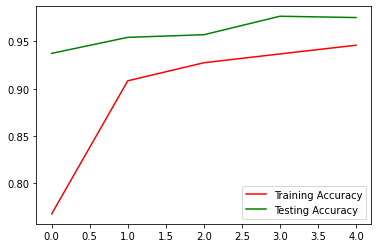

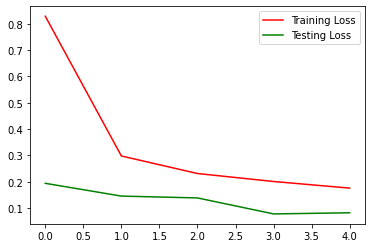

F:\APPS\PANDAS\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
%matplotlib inline
accu=res.history['accuracy']
val_acc=res.history['val_accuracy']
loss=res.history['loss']
val_loss=res.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()
		
model.save("HindiModel2.h5")

In [8]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
# import imutils
import cv2

''' ["ka","kha","ga","gha","kna","cha","chha","ja","jha","yna","t`a","t`ha","d`a","d`ha","adna","ta","tha","da","dha","na","pa","pha","ba","bha","ma","yaw","ra","la","waw","sha","shat","sa","ha","aksha","tra","gya","0","1","2","3","4","5","6","7","8","9"]
labels =['yna', 't`aa', 't`haa', 'd`aa', 'd`haa', 'a`dna', 'ta', 'tha', 'da', 'dha', 'ka', 'na', 'pa', 'pha', 'ba', 'bha', 'ma', 'yaw', 'ra', 'la', 'waw', 'kha', 'sha', 'shat', 'sa', 'ha', 'aksha', 'tra', 'gya', 'ga', 'gha', 'kna', 'cha', 'chha', 'ja', 'jha', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
'''
labels = [u'\u091E',u'\u091F',u'\u0920',u'\u0921',u'\u0922',u'\u0923',u'\u0924',u'\u0925',u'\u0926',u'\u0927',u'\u0915',u'\u0928',u'\u092A',u'\u092B',u'\u092c',u'\u092d',u'\u092e',u'\u092f',u'\u0930',u'\u0932',u'\u0935',u'\u0916',u'\u0936',u'\u0937',u'\u0938',u'\u0939','ksha','tra','gya',u'\u0917',u'\u0918',u'\u0919',u'\u091a',u'\u091b',u'\u091c',u'\u091d',u'\u0966',u'\u0967',u'\u0968',u'\u0969',u'\u096a',u'\u096b',u'\u096c',u'\u096d',u'\u096e',u'\u096f']
#
import numpy as np
from keras.preprocessing import image
test_image = cv2.imread("c.png")
image = cv2.resize(test_image, (32,32))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=3)
print("[INFO] loading network...")
import tensorflow as tf
model = tf.keras.models.load_model("F:\PE UDEMY\TEXT DETECTION\FINAL 2\HindiModel2.h5")
lists = model.predict(image)[0]
print("The letter is ",labels[np.argmax(lists)])

[INFO] loading network...
1/1 [==============================] - 0s 220ms/step
The letter is  ज


In [12]:
# pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'

NameError: name 'pytesseract' is not defined

In [29]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
# import imutils
import cv2

''' ["ka","kha","ga","gha","kna","cha","chha","ja","jha","yna","t`a","t`ha","d`a","d`ha","adna","ta","tha","da","dha","na","pa","pha","ba","bha","ma","yaw","ra","la","waw","sha","shat","sa","ha","aksha","tra","gya","0","1","2","3","4","5","6","7","8","9"]
labels =['yna', 't`aa', 't`haa', 'd`aa', 'd`haa', 'a`dna', 'ta', 'tha', 'da', 'dha', 'ka', 'na', 'pa', 'pha', 'ba', 'bha', 'ma', 'yaw', 'ra', 'la', 'waw', 'kha', 'sha', 'shat', 'sa', 'ha', 'aksha', 'tra', 'gya', 'ga', 'gha', 'kna', 'cha', 'chha', 'ja', 'jha', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
'''
labels = [u'\u091E',u'\u091F',u'\u0920',u'\u0921',u'\u0922',u'\u0923',u'\u0924',u'\u0925',u'\u0926',u'\u0927',u'\u0915',u'\u0928',u'\u092A',u'\u092B',u'\u092c',u'\u092d',u'\u092e',u'\u092f',u'\u0930',u'\u0932',u'\u0935',u'\u0916',u'\u0936',u'\u0937',u'\u0938',u'\u0939','ksha','tra','gya',u'\u0917',u'\u0918',u'\u0919',u'\u091a',u'\u091b',u'\u091c',u'\u091d',u'\u0966',u'\u0967',u'\u0968',u'\u0969',u'\u096a',u'\u096b',u'\u096c',u'\u096d',u'\u096e',u'\u096f']
#
import numpy as np
from keras.preprocessing import image
test_image = cv2.imread("d.jpg")
image = cv2.resize(test_image, (32,32))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=3)
print("[INFO] loading network...")
import tensorflow as tf
model = tf.keras.models.load_model("F:\PE UDEMY\TEXT DETECTION\FINAL 2\HindiModel2.h5")
lists = model.predict(image)[0]
print("The letter is ",labels[np.argmax(lists)])

[INFO] loading network...
1/1 [==============================] - 0s 387ms/step
The letter is  ख


F:\APPS\PANDAS\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2358 (\N{DEVANAGARI LETTER SHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\APPS\PANDAS\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
F:\APPS\PANDAS\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\APPS\PANDAS\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\APPS\PANDAS\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\APPS\PANDAS\lib\site-packages\IPython\core\pylabtools.py:151: UserWarn

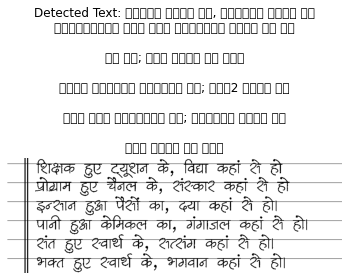

Detected Text: शिकाव यूशन के, विद्या कहां थे
प्रोग्राम हुए जैछ लंस्काश कहां सै हो

पं का; दया कहां टी हो।

पाती हुक्ञा केमिकल का; गां2 कहां सै

संत हुए श्वार्ध के; शत्संग कहां टी

वान कहां थी हो।


In [41]:
import cv2
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

# Replace with the path to your Tesseract installation
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load your image
image_path = "a.jpg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform thresholding to enhance text
_, thresh_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Specify the Tesseract data path directly in the command
tessdata_dir_config = '--tessdata-dir "C:\\Program Files\\Tesseract-OCR\\tessdata"'

# Use pytesseract to extract text in Hindi
detected_text = pytesseract.image_to_string(Image.fromarray(thresh_image), lang='hin', config=tessdata_dir_config)

# Display the image and detected text
plt.imshow(thresh_image, cmap="gray")
plt.title(f"Detected Text: {detected_text.strip()}")
plt.axis("off")
plt.show()

# Print the detected text
print("Detected Text:", detected_text.strip())
